# Heart failures prediction - Machine learn classification

## Problem Definition

Predict, based on clinical parameters, whether a patient has or not heart disease.

## Data

This dataset was created by combining different datasets already available independently but not combined before. In this dataset, 5 heart datasets are combined over 11 common features which makes it the largest heart disease dataset available so far for research purposes. The five datasets used for its curation are:

* Cleveland: 303 observations
* Hungarian: 294 observations
* Switzerland: 123 observations
* Long Beach VA: 200 observations
* Stalog (Heart) Data Set: 270 observations

Total: 1190 observations

Duplicated: 272 observations

`Final dataset: 918 observations`

Every dataset used can be found under the Index of heart disease datasets from UCI Machine Learning Repository on the following link: https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/

It can also be found on Kaggle using the following link: https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction

## Goal

> We aiming to reach scores of +90% accuracy in a model at predicting whether a patient has or not heart disease.

## Evaluation Metric

For the proper evaluation we will make use of:

* AUC-ROC (Area Under the Receiver Operating Characteristic Curve)
* Confusion matrix
* Classification Report
* Accuracy / precision / recall / F1 score
    

## Features

**This is our data dictionary**

1. Age: age of the patient [years] -> All adults between 27 and 77 years.
2. Sex: sex of the patient [M: Male, F: Female]
3. ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
4. RestingBP: resting blood pressure [mm] -> Unfortunatelly, we only have the systolic data.
5. Cholesterol: serum cholesterol [mm/dl]
6. FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
7. RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
8. MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
9. ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
10. Oldpeak: oldpeak = ST [Numeric value measured in depression]
11. ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
12. HeartDisease: output class [1: heart disease, 0: Normal]

## Preparing the tools

We're going to use pandas, Matplotlib and NumPy for data analysis and manipulation. For our models we'll work with the following:

* RandomForestClassifer
* LogisticRegression
* KNeighborsClassifier
* CatBoost
* XGBoost

In [1]:
# Import all the tools we need

# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# we want our plots to appear inside the notebook
%matplotlib inline 

# Ignore the notebook warnings
import warnings
warnings.filterwarnings('ignore')

# Models we gonna use
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import catboost as cb
import xgboost as xgb

# Models tuning
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from sklearn.metrics import recall_score, f1_score, accuracy_score, precision_score

## Load data

In [2]:
df = pd.read_csv('heart.csv')

## Data exploratory and preprocessing

In [3]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
# There're any missing values?
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

What can we infere at a first glance:

* We have 918 rows in the DataFrame and a total of 12 columns
* We have both numeric and non-numerical column types
* No missing values

In [6]:
# Let's find out how many of each class there
df['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

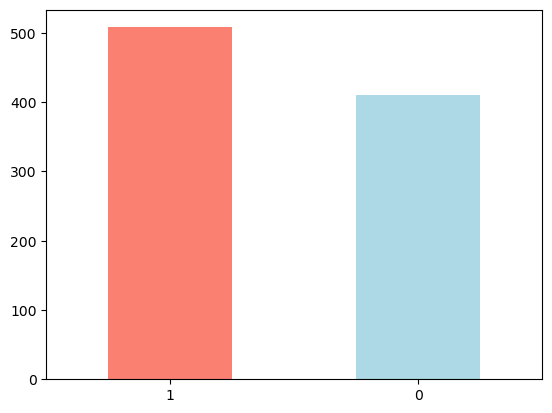

In [7]:
df['HeartDisease'].value_counts().plot(kind="bar", color=["salmon", "lightblue"], rot=0);

Out of 918, 55.33% of the patients have heart disease

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


Both 'RestingBP' and 'Cholesterol' having 0 value are kinda strange. Under normal circumstances, resting blood pressure or cholesterol levels are unlikely to be zero, so it means that missing values were enter as 0.

Let's make a copy of our df so we can transform all it's values into numeric and work with them.

### Copy the DataFrame

In [9]:
# Make a copy of the original DataFrame to perform edits on
df_copy = df.copy(deep=True)

In [10]:
df_copy.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


### Transform all the values into numeric

In [11]:
# Map the string values in 'ChestPainType' feature to numeric values
ChestPainType_mapping = {'TA': 1,
                         'ATA': 2,
                         'NAP': 3,
                         'ASY': 4}

# Map the string values in 'ST_Slope' feature to numeric values
ST_Slope_mapping = {'Up': 1,
                    'Flat': 2,
                    'Down': 3}

# Map the string values in 'RestingECG' feature to numeric values
RestingECG_mapping = {'Normal': 1,
                      'ST': 2,
                      'LVH': 3}

# Map the string values in 'Sex' feature to numeric values
Sex_mapping = {'F': 0,
               'M': 1}

# Map the string values in 'ExerciseAngina' feature to numeric values
ExerciseAngina_mapping = {'N': 0,
                          'Y': 1}

# Create a dictionary of feature mappings
feature_mappings = {'ChestPainType': ChestPainType_mapping,
                    'ST_Slope': ST_Slope_mapping,
                    'RestingECG': RestingECG_mapping,
                    'Sex': Sex_mapping,
                    'ExerciseAngina': ExerciseAngina_mapping}

# Loop through each feature mapping and apply the mapping to the corresponding column
for feature, mapping in feature_mappings.items():
    df_copy[feature] = df_copy[feature].map(mapping)

    
# Converting the entire DataFrame to numeric format
df_copy = df_copy.apply(pd.to_numeric, errors='ignore')

In [12]:
df_copy.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,2,140,289,0,1,172,0,0.0,1,0
1,49,0,3,160,180,0,1,156,0,1.0,2,1
2,37,1,2,130,283,0,2,98,0,0.0,1,0
3,48,0,4,138,214,0,1,108,1,1.5,2,1
4,54,1,3,150,195,0,1,122,0,0.0,1,0


### Check how many 0 values we have on RestinBP and Cholesterol features

Earlier we saw that we have 0 values on both RestinBP and Cholesterol features and that we can consider these 0 values are equal missing values. Let's check how many 0 values we have:

In [13]:
# Check number of 0 values on RestingBP column
df_copy.RestingBP[df_copy.RestingBP==0].count()

1

In [14]:
# Check number of 0 values on Cholesterol column
df_copy.Cholesterol[df_copy.Cholesterol==0].count()

172

### Check relation between continuous variables and Target variable

We have many **missing values on Cholesterol** and this variable might be very connected to the target variable. Mainly in order to see cholesterol's connection, we'll take the chance and also check all the continuous variables connection to the target variable.

T-test for Oldpeak:
t-statistic: -13.364696790867978
p-value: 2.3907724240589574e-37



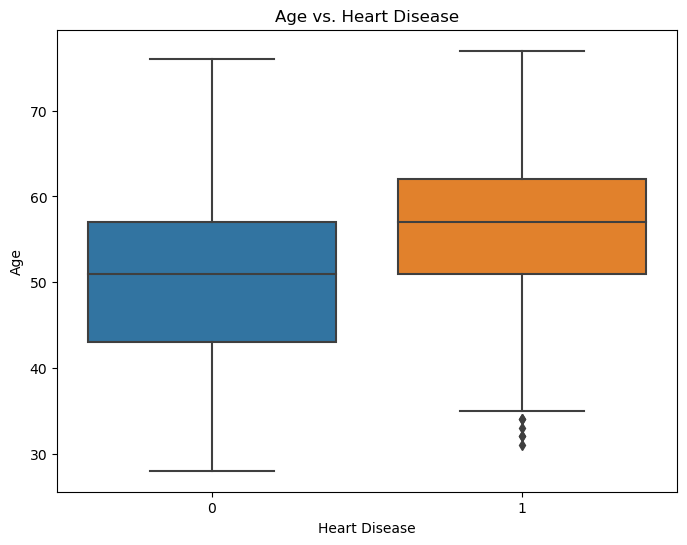

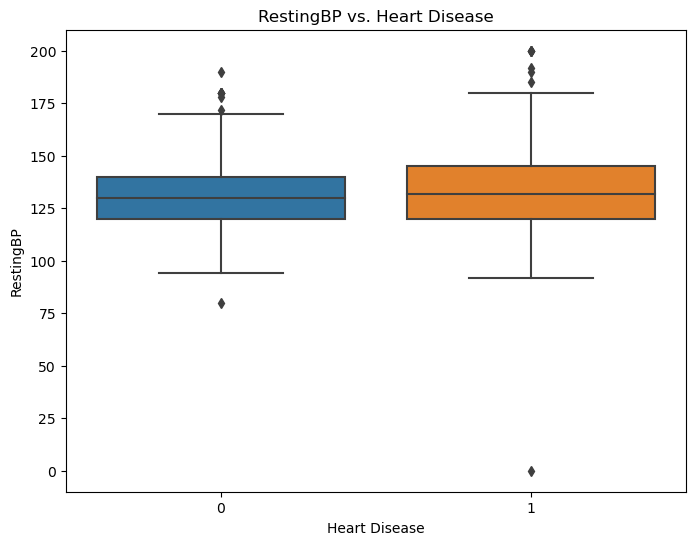

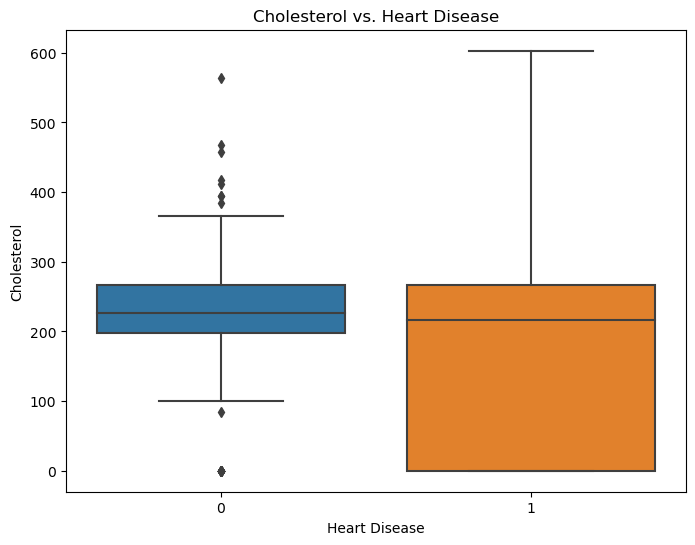

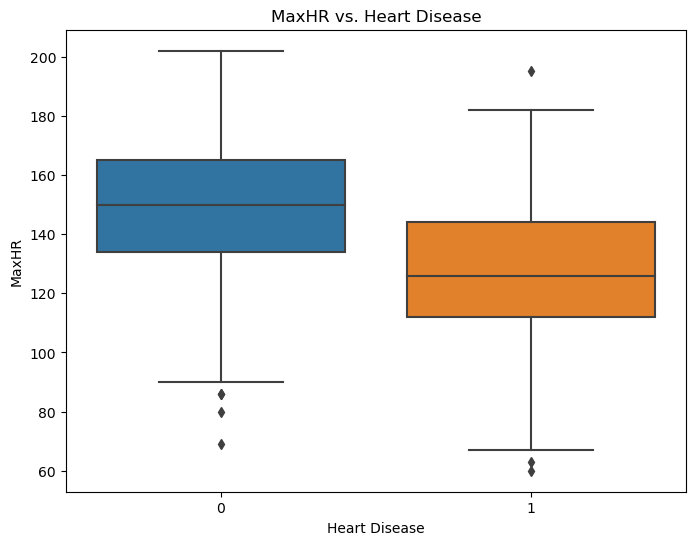

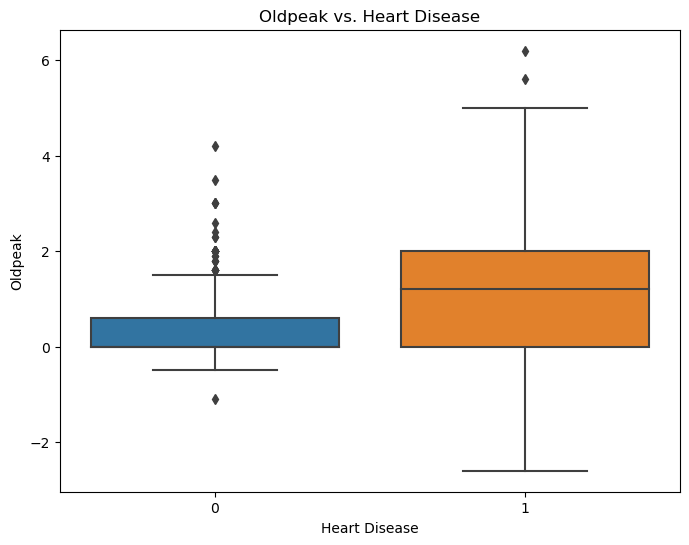

In [15]:
# Continuous variables
continuous_vars = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

# Box plots for continuous variables
for var in continuous_vars:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='HeartDisease', y=var, data=df_copy)
    plt.title(f'{var} vs. Heart Disease')
    plt.xlabel('Heart Disease')
    plt.ylabel(var)
    
# Statistical analysis
print(f'T-test for {var}:')
t_statistic, p_value = stats.ttest_ind(df_copy[df_copy['HeartDisease'] == 0][var], df_copy[df_copy['HeartDisease'] == 1][var])
print('t-statistic:', t_statistic)
print('p-value:', p_value)
print()
    
plt.show()

* Age -> Looks that a huge part of the samples who have heart disease belongs to people over 50 years old.
* RestingBP -> More than half of the samples have heart disease and all ver 140 are positive to it.
* Cholesterol -> Apparently the number of positive and negative heart disease samples are kinda even, but the higher the level cholesterol level, higher the chance of have heart disease.
* MaxHR -> Looks that lower the maxHR achieved, higher the chance of positive heart disease.
* Oldpeak -> Looks that in a higher measure of oldpeak, almost every sample have heart disease.

Let's check how much of the samples who have 0 cholesterol value have heart disease.

In [16]:
cholesterol_zeros = len(df_copy[(df_copy['Cholesterol'] == 0)])
print(f'Number of samples with a value of 0 : {cholesterol_zeros}')

Number of samples with a value of 0 : 172


### Drop the rows with 0 values on RestingBP and Cholesterol

The missing values on cholesterol looks to cause an underisered misjudgement from the model, so we gonna remove these incomplete samples from our experimentations. We'll do the same with the one RestingBP 0 value row as it won't be that of a difference on the number of samples but it also removes a potencial cause of misjudge.

In [17]:
df_copy = df_copy[df_copy.RestingBP != 0]

In [18]:
df_copy = df_copy[df_copy.Cholesterol != 0]

In [19]:
df_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,746.0,52.882038,9.505888,28.0,46.00,54.0,59.0,77.0
Sex,746.0,0.756032,0.429762,0.0,1.00,1.0,1.0,1.0
ChestPainType,746.0,3.163539,0.955414,1.0,2.00,3.0,4.0,4.0
RestingBP,746.0,133.022788,17.282750,92.0,120.00,130.0,140.0,200.0
Cholesterol,746.0,244.635389,59.153524,85.0,207.25,237.0,275.0,603.0
FastingBS,746.0,0.167560,0.373726,0.0,0.00,0.0,0.0,1.0
RestingECG,746.0,1.639410,0.838664,1.0,1.00,1.0,2.0,3.0
MaxHR,746.0,140.226542,24.524107,69.0,122.00,140.0,160.0,202.0
ExerciseAngina,746.0,0.384718,0.486855,0.0,0.00,0.0,1.0,1.0
Oldpeak,746.0,0.901609,1.072861,-0.1,0.00,0.5,1.5,6.2


### Enrich our DataFrame features

We gonna enhance our RestingBP and Cholesteral features spliting them into categories. We gonna do this looking to help our model find new patterns on the data. 

#### RestingBP

Search we discovered that slight differences on the **RestingBP** measures may lead to different categories. Let's start separating our **RestingBP** feature into 4 categories:
* 0 -> Normal: Less than 120
* 1 -> Elevated: 120–129
* 2 -> High Blood Pressure (Hypertension) Stage 1: 130–139
* 3 -> High Blood Pressure (Hypertension) Stage 2: 140 or higher

We got these measures from: https://www.baptisthealth.com/blog/heart-care/healthy-blood-pressure-by-age-and-gender-chart

In [20]:
# Split RestingBP into 4 different categories
df_copy.loc[df_copy['RestingBP'] < 120, 'RestingBP'] = 0
df_copy.loc[(df_copy['RestingBP'] >= 120) & (df_copy['RestingBP'] < 130), 'RestingBP'] = 1
df_copy.loc[(df_copy['RestingBP'] >= 130) & (df_copy['RestingBP'] < 140), 'RestingBP'] = 2
df_copy.loc[df_copy['RestingBP'] >= 140, 'RestingBP'] = 3

In [21]:
df_copy.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,2,3,289,0,1,172,0,0.0,1,0
1,49,0,3,3,180,0,1,156,0,1.0,2,1
2,37,1,2,2,283,0,2,98,0,0.0,1,0
3,48,0,4,2,214,0,1,108,1,1.5,2,1
4,54,1,3,3,195,0,1,122,0,0.0,1,0


#### Cholesterol

We saw higher the level **cholesterol level**, higher the chance of have heart disease. Searching we discovered that slight differences of the **cholesterol level** may lead to different categories.

We gonna split **Cholesterol** feature into three different categories:

* 0 -> Desirable: Less than 200mg/dL
* 1 -> Boderline High: 200-239 mg/dL
* 2 -> High: 240mg/dL and above

We got those measures from: https://medlineplus.gov/lab-tests/cholesterol-levels/

In [22]:
# Split Cholesterol into 3 different categories
df_copy.loc[df_copy['Cholesterol'] < 200, 'Cholesterol'] = 0
df_copy.loc[(df_copy['Cholesterol'] >= 200) & (df_copy['Cholesterol'] < 240), 'Cholesterol'] = 1
df_copy.loc[df_copy['Cholesterol'] >= 240, 'Cholesterol'] = 2

In [23]:
df_copy.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,2,3,2,0,1,172,0,0.0,1,0
1,49,0,3,3,0,0,1,156,0,1.0,2,1
2,37,1,2,2,2,0,2,98,0,0.0,1,0
3,48,0,4,2,1,0,1,108,1,1.5,2,1
4,54,1,3,3,0,0,1,122,0,0.0,1,0


### Look the relation between the target variable and the categorical variables
Now let's look at the relationship between the target variable (HeartDisease) and our **categorical variables...**

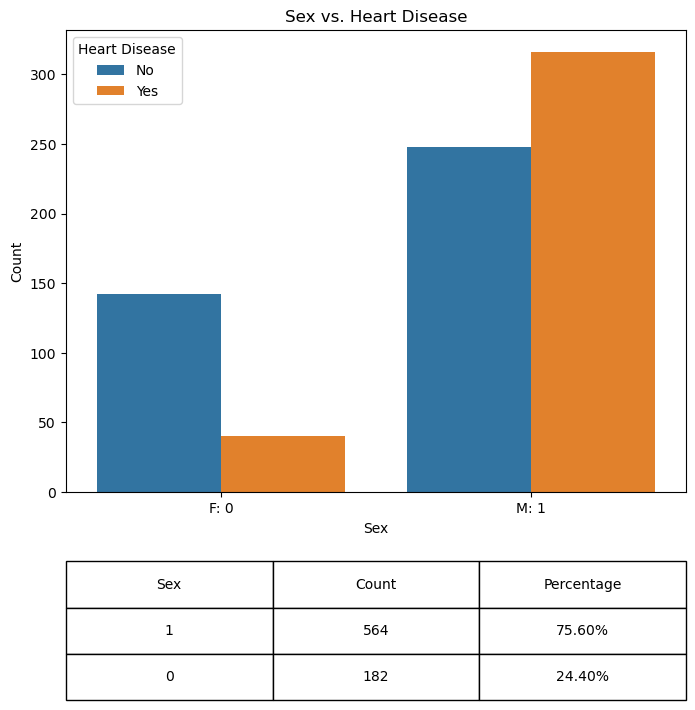

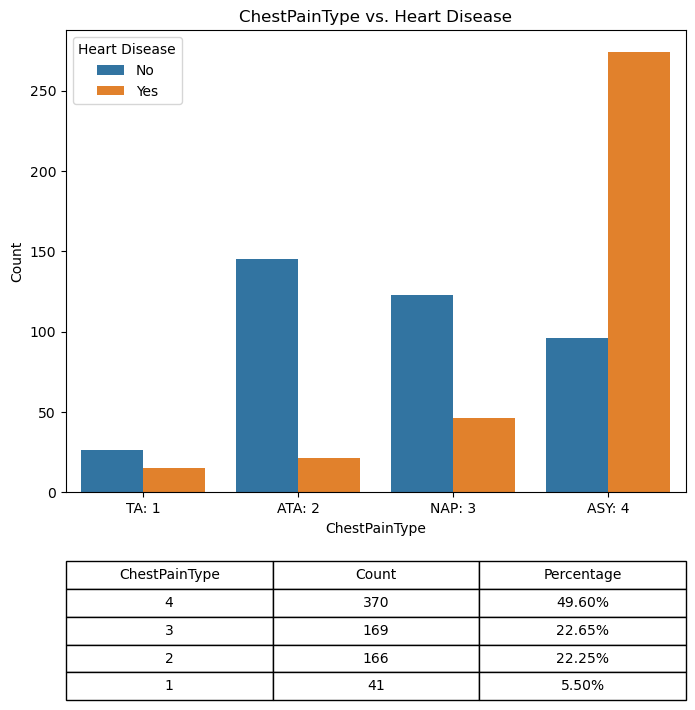

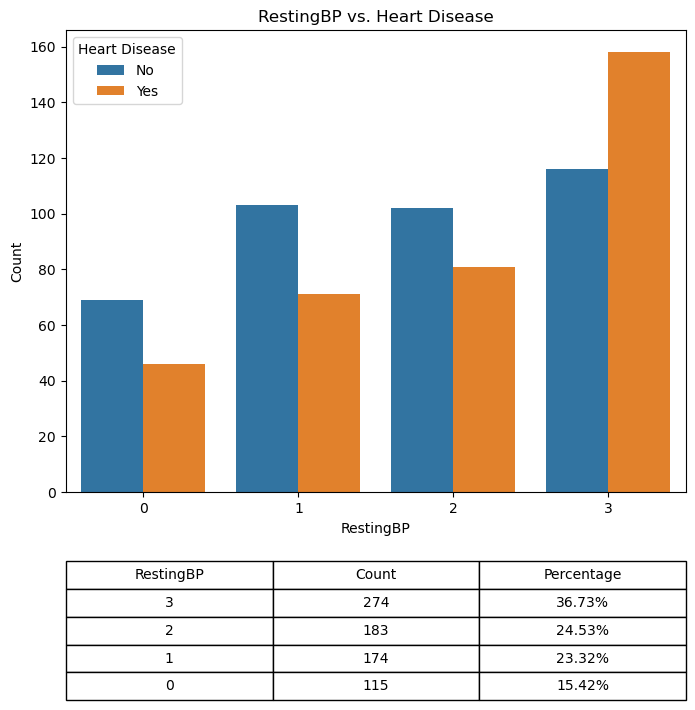

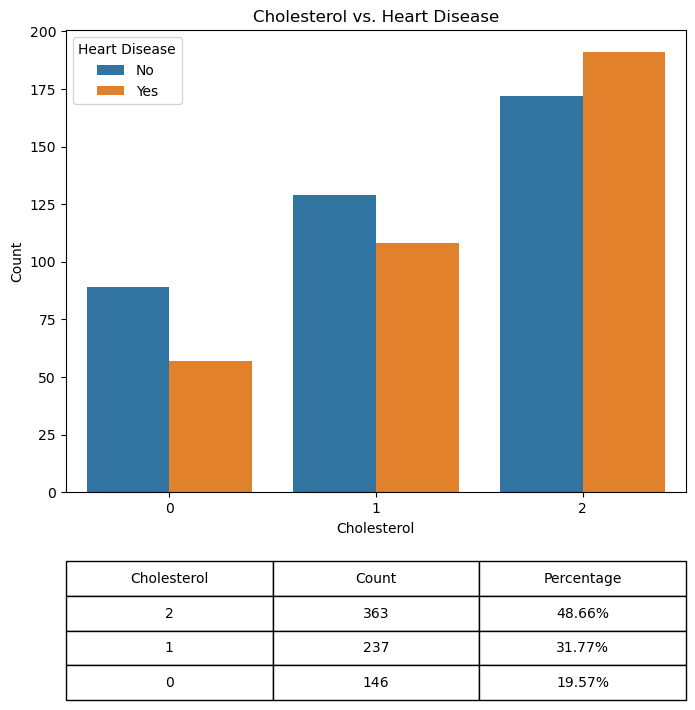

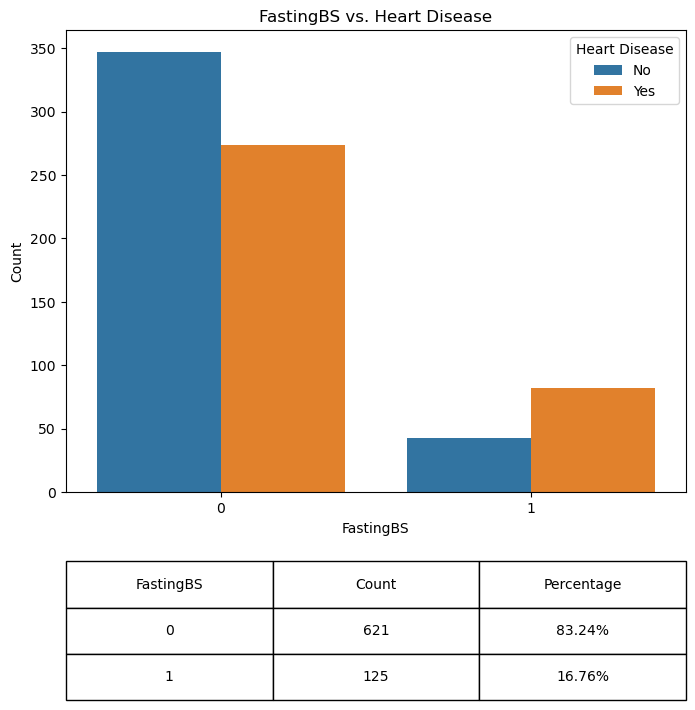

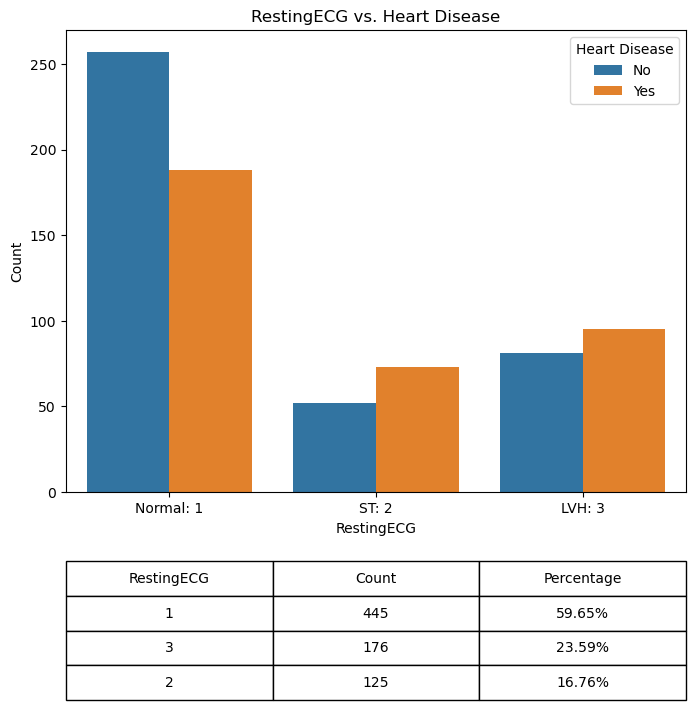

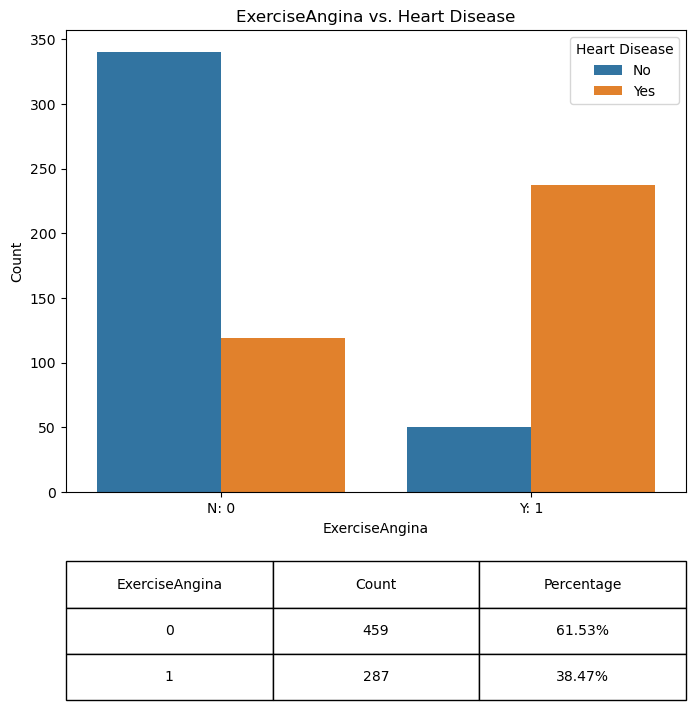

In [24]:
# Categorical variables
categorical_vars = ['Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'ExerciseAngina']

# Bar plots for categorical variables
for var in categorical_vars:
    plt.figure(figsize=(8, 6))
    ax = sns.countplot(x=var, hue='HeartDisease', data=df_copy)
    plt.title(f'{var} vs. Heart Disease')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.legend(title='Heart Disease', labels=['No', 'Yes'])

    # Calculate counts and percentages
    total_counts = df_copy[var].value_counts()
    total_counts_percent = total_counts / total_counts.sum() * 100

    # Display percentages in a table
    table_data = {'Count': total_counts, 'Percentage': total_counts_percent}
    table_df = pd.DataFrame(table_data)
    table_df['Percentage'] = table_df['Percentage'].map('{:.2f}%'.format)
    table_df = table_df.reset_index().rename(columns={'index': var})
    plt.table(cellText=table_df.values, colLabels=table_df.columns, cellLoc='center',
              bbox=[0.0, -0.45, 1.0, 0.3], loc='lower center')

    # Add legends for mapped values
    if var == 'ChestPainType':
        labels = [f'{key}: {value}' for key, value in ChestPainType_mapping.items()]
        ax.set_xticklabels(labels)
    elif var == 'ST_Slope':
        labels = [f'{key}: {value}' for key, value in ST_Slope_mapping.items()]
        ax.set_xticklabels(labels)
    elif var == 'RestingECG':
        labels = [f'{key}: {value}' for key, value in RestingECG_mapping.items()]
        ax.set_xticklabels(labels)
    elif var == 'Sex':
        labels = [f'{key}: {value}' for key, value in Sex_mapping.items()]
        ax.set_xticklabels(labels)
    elif var == 'ExerciseAngina':
        labels = [f'{key}: {value}' for key, value in ExerciseAngina_mapping.items()]
        ax.set_xticklabels(labels)

    plt.show()

* Sex -> Looks like 78.98% of patients who have heart disease are male and almost 2/3 of the males have heart disease while with the female is the opposite, less than half of them have heart disease.

* ChestPaintType -> `TA`: Typical Angina, `ATA`: Atypical Angina, `NAP`: Non-Anginal Pain, `ASY`: Asymptomatic -> While patients with TA, ATA and NAP in the majority doesn't have heart disease, a **massive** amount of the patients with ASY have it.

* RestingBP -> We can observe that only people with hypertesion 2 (4) have more heart disease than don't. Also, this proportion looks to already grow in hypertension 1 (3) in comparison to lower RestingBP levels.

* Cholesterol -> We can see in our new distributions how much the chances of having heart disease increase in proportion to how high the cholesterol level is

* FastingBS -> fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise] -> The absence of bif sugar quantities in the blood doesn't seems to affect much the presence of heart disease, while higher sugar quantities looks to be **directly connected** to it.

* RestingECG -> resting electrocardiogram results -> ST seems to be the most connected to heart disease presence (around double 2/3 of the patients with ST have it).

## Modeling

We've explored the data and worked on the data, now we'll use machine learning to predict our target variable based on the 11 independent variables.

We'll use 5 different machine learning models to make the prediction and see who performs better following our previous criteria of evaluation. Therefore, our models to be used will be:

* RandomForestClassifer
* LogisticRegression
* KNeighborsClassifier
* CatBoost
* XGBoost

Let's start **splitting the variable ('HeartDisease')** from the rest and then **splitting our data in train and test sets...**

In [25]:
# Everything except target variable
X = df_copy.drop('HeartDisease', axis=1)

# Target variable
y = df_copy['HeartDisease'].values

# Independent variables (no target column)
X.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,2,3,2,0,1,172,0,0.0,1
1,49,0,3,3,0,0,1,156,0,1.0,2
2,37,1,2,2,2,0,2,98,0,0.0,1
3,48,0,4,2,1,0,1,108,1,1.5,2
4,54,1,3,3,0,0,1,122,0,0.0,1


In [26]:
# Random seed for reproducibility
np.random.seed(42)

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X, # independent variables 
                                                    y, # dependent variable
                                                    test_size = 0.2) # percentage of data to use for test set

len(X_train), len(y_train), len(X_test), len(y_test)

(596, 596, 150, 150)

### Model Creation
Now we splitted our data into 734 samples for the training set and 184 samples for the test set. Let's go now with our **model creation.**

In [ ]:
#  First create dictionary of models
models = {'Random Forest': RandomForestClassifier(),
          'Logistic Regression': LogisticRegression(),
          'KNN': KNeighborsClassifier(),
          'CatBoost': cb.CatBoostClassifier(),
          'XGBoost': xgb.XGBClassifier()}

# Fit the model to the data
for name, model in models.items():
    model.fit(X_train, y_train)
        

# Define a function to compute our evaluation metrics
def compute_metrics(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    
    auc_roc = roc_auc_score(y_test, y_pred_prob)
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    return auc_roc, cm, report, acc, prec, rec, f1

# Define a function so we can check later our metrics scores
def metrics_scores(models_dict, X_test, y_test):
    # Create an empty DataFrame to store the results
    results_df = pd.DataFrame(columns=['Model', 'AUC-ROC', 'Confusion Matrix', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
    # Iterate over the dictionary items
    for model_name, model in models_dict.items():
        auc_roc, cm, report, acc, prec, rec, f1 = compute_metrics(model, X_test, y_test)
        # Store metrics in the results DataFrame
        results_df = results_df.append({'Model': model_name, 'AUC-ROC': auc_roc, 'Confusion Matrix': cm, 'Accuracy': acc, 'Precision': prec, 'Recall': rec, 'F1 Score': f1}, ignore_index=True)
    return results_df

### Model comparison
The models were all created and we also made a function to score them based on our evaluation metrics. Let's see the **model comparision:**

In [28]:
# Call our metrics_scores function
metrics_scores(models, X_test, y_test)

,Model,AUC-ROC,Confusion Matrix,Accuracy,Precision,Recall,F1 Score
0,Random Forest,0.950883,"[[67, 4], [13, 66]]",0.886667,0.942857,0.835443,0.885906
1,Logistic Regression,0.940631,"[[63, 8], [11, 68]]",0.873333,0.894737,0.860759,0.877419
2,KNN,0.730255,"[[51, 20], [25, 54]]",0.700000,0.729730,0.683544,0.705882
3,CatBoost,0.964521,"[[67, 4], [9, 70]]",0.913333,0.945946,0.886076,0.915033
4,XGBoost,0.949902,"[[66, 5], [13, 66]]",0.880000,0.929577,0.835443,0.880000


At first sight, the RandomForest and CatBoost models appear to be the top performers. Both of them show high AUC-ROC scores, good performance in the confusion matrices, and relatively high precision, recall, and F1 scores. Let's use RandomizedSearchCV to tune our models and see if we can get some improvement.

First we gonna create a **hyperparameter grid** for our models so we can start with the tuning...

In [29]:
# RandomForest grid:
rf_grid = {'n_estimators': [100, 200, 300],
           'max_depth': [None, 5, 10],
           'min_samples_split': [2, 5, 10],
           'min_samples_leaf': [1, 2, 4],
           'max_features': ['auto', 'sqrt']}

# LogisticRegression grid:
log_reg_grid = {'C': [0.1, 1.0, 10.0],
                'solver': ['liblinear', 'saga'],
                'penalty': ['l1', 'l2']}

# KNeighbors grid:
KNN_grid = {'n_neighbors': [3, 5, 7],
           'weights': ['uniform', 'distance'],
           'p': [1, 2]}

# catboost grid:
cb_grid = {'iterations': [250, 300, 350],
           'depth': [3, 4, 6],
           'learning_rate': [0.05, 0.07, 0.09],
           'l2_leaf_reg': [0.5, 1, 1.5],
           'colsample_bylevel': [0.3, 0.5, 1.0]}

# XGBoost grid:
xgb_grid = {'n_estimators': [100, 200, 300],
            'max_depth': [3, 5, 6, 9],
            'learning_rate': [0.1, 0.3, 0.5],
            'subsample':[0.5, 1],
            'colsample_bytree': [0.5, 1]}

### Tune with RandomizedSearchCV

In [ ]:
# Let's write a function so RandomizedSearchCV can tune all at once

def run_random_search(model, param_grid):
    rs = RandomizedSearchCV(model, param_distributions=param_grid, scoring='accuracy', cv=15, n_iter=50, verbose=True)
    rs.fit(X_train, y_train)
    return rs

np.random.seed(42)

# We gonna use rs = RandomSearch
rs_rf = run_random_search(RandomForestClassifier(), rf_grid)
rs_log_reg = run_random_search(LogisticRegression(), log_reg_grid)
rs_KNN = run_random_search(KNeighborsClassifier(), KNN_grid)
rs_cb = run_random_search(cb.CatBoostClassifier(), cb_grid)
rs_xgb = run_random_search(xgb.XGBClassifier(), xgb_grid)

In [31]:
# Let's check the best params

rs_models = {'rs_rf': rs_rf,
             'rs_log_reg': rs_log_reg,
             'rs_KNN': rs_KNN,
             'rs_cb': rs_cb,
             'rs_xgb': rs_xgb}

# Function to look the best params
def best_params_list(models_dict):
    best_params = {}
    for name, model in models_dict.items():
        # Retrieve the best parameters for each model
        best_params[name] = model.best_params_
    return best_params

best_params_list(rs_models)      

{'rs_rf': {'n_estimators': 200,
  'min_samples_split': 2,
  'min_samples_leaf': 1,
  'max_features': 'sqrt',
  'max_depth': 5},
 'rs_log_reg': {'solver': 'liblinear', 'penalty': 'l1', 'C': 1.0},
 'rs_KNN': {'weights': 'uniform', 'p': 1, 'n_neighbors': 7},
 'rs_cb': {'learning_rate': 0.05,
  'l2_leaf_reg': 1,
  'iterations': 250,
  'depth': 3,
  'colsample_bylevel': 0.5},
 'rs_xgb': {'subsample': 1,
  'n_estimators': 300,
  'max_depth': 3,
  'learning_rate': 0.1,
  'colsample_bytree': 0.5}}

### rs_models comparison

Let's compare our RandomizedSearch tuned models and see what changed...

In [32]:
# Call our metrics_score function but this time for our rs_models
metrics_scores(rs_models, X_test, y_test)

,Model,AUC-ROC,Confusion Matrix,Accuracy,Precision,Recall,F1 Score
0,rs_rf,0.957746,"[[66, 5], [11, 68]]",0.893333,0.931507,0.860759,0.894737
1,rs_log_reg,0.938492,"[[61, 10], [12, 67]]",0.853333,0.870130,0.848101,0.858974
2,rs_KNN,0.815297,"[[51, 20], [21, 58]]",0.726667,0.743590,0.734177,0.738854
3,rs_cb,0.969157,"[[67, 4], [11, 68]]",0.900000,0.944444,0.860759,0.900662
4,rs_xgb,0.962025,"[[66, 5], [11, 68]]",0.893333,0.931507,0.860759,0.894737


In [33]:
metrics_scores(models, X_test, y_test)

,Model,AUC-ROC,Confusion Matrix,Accuracy,Precision,Recall,F1 Score
0,Random Forest,0.950883,"[[67, 4], [13, 66]]",0.886667,0.942857,0.835443,0.885906
1,Logistic Regression,0.940631,"[[63, 8], [11, 68]]",0.873333,0.894737,0.860759,0.877419
2,KNN,0.730255,"[[51, 20], [25, 54]]",0.700000,0.729730,0.683544,0.705882
3,CatBoost,0.964521,"[[67, 4], [9, 70]]",0.913333,0.945946,0.886076,0.915033
4,XGBoost,0.949902,"[[66, 5], [13, 66]]",0.880000,0.929577,0.835443,0.880000


Wonderful! We got a huge improvement on our CatBoost model and other two good scores on RandomForest and XGBoost. Let's pickem three and tune with GridSearchCV see if we can improve even further.

### Tune with GridSearchCV

In [34]:
np.random.seed(42)

# RandomForest bigger grid with more hyperparameters
rf_bigger_grid = {'n_estimators': [100, 200, 300],
           'max_depth': [None, 4, 5, 6],
           'min_samples_split': [1, 2, 3],
           'min_samples_leaf': [1, 2, 3],
           'max_features': ['auto', 'sqrt', 'log2']}

# CatBoost bigger grid with more hyperparameters
cb_bigger_grid = {'iterations': [200, 250, 300, 350, 400],
           'depth': [1, 2, 3, 4],
           'learning_rate': [0.05, 0.07, 1],
           'l2_leaf_reg': [1, 1.5, 2],
           'colsample_bylevel': [0.5, 1, 1.5]}

# XGBoost bigger grid with more hyperparameters
xgb_bigger_grid = {'n_estimators': [100, 200, 300, 400],
                   'max_depth': [None, 2, 3, 4],
                   'learning_rate': [0.03, 0.05, 0.1],
                   'subsample':[0.3, 0.5, 1],
                   'colsample_bytree': [0.5, 0.7, 0.8, 1]}


# Function to run GridSearch
def run_grid_search(model, param_grid):
    gs = GridSearchCV(model, param_grid=param_grid, scoring='accuracy', cv=5, verbose=True)
    gs.fit(X_train, y_train)
    return gs

In [ ]:
%%time
# We gonna use gs = GridSearch
gs_rf = run_grid_search(RandomForestClassifier(), rf_bigger_grid)

In [ ]:
%%time
gs_cb = run_grid_search(cb.CatBoostClassifier(), cb_bigger_grid)

In [ ]:
%%time
gs_xgb = run_grid_search(xgb.XGBClassifier(), xgb_bigger_grid)

In [38]:
# Let's check the best params

gs_models = {'gs_rf': gs_rf,
             'gs_cb': gs_cb,
             'gs_xgb': gs_xgb}

# Function to look the best params
def best_params_list(models_dict):
    best_params = {}
    for name, model in models_dict.items():
        # Retrieve the best parameters for each model
        best_params[name] = model.best_params_
    return best_params

best_params_list(gs_models)      

{'gs_rf': {'max_depth': 6,
  'max_features': 'log2',
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'n_estimators': 300},
 'gs_cb': {'colsample_bylevel': 0.5,
  'depth': 2,
  'iterations': 350,
  'l2_leaf_reg': 1.5,
  'learning_rate': 0.05},
 'gs_xgb': {'colsample_bytree': 0.7,
  'learning_rate': 0.05,
  'max_depth': 3,
  'n_estimators': 100,
  'subsample': 0.5}}

In [39]:
# Call our metrics_score function to see gs_models scores
metrics_scores(gs_models, X_test, y_test)

,Model,AUC-ROC,Confusion Matrix,Accuracy,Precision,Recall,F1 Score
0,gs_rf,0.957212,"[[67, 4], [12, 67]]",0.893333,0.943662,0.848101,0.893333
1,gs_cb,0.972544,"[[66, 5], [10, 69]]",0.900000,0.932432,0.873418,0.901961
2,gs_xgb,0.965234,"[[66, 5], [9, 70]]",0.906667,0.933333,0.886076,0.909091


In [40]:
# Compare to rs_models scores
metrics_scores(rs_models, X_test, y_test)

,Model,AUC-ROC,Confusion Matrix,Accuracy,Precision,Recall,F1 Score
0,rs_rf,0.957746,"[[66, 5], [11, 68]]",0.893333,0.931507,0.860759,0.894737
1,rs_log_reg,0.938492,"[[61, 10], [12, 67]]",0.853333,0.870130,0.848101,0.858974
2,rs_KNN,0.815297,"[[51, 20], [21, 58]]",0.726667,0.743590,0.734177,0.738854
3,rs_cb,0.969157,"[[67, 4], [11, 68]]",0.900000,0.944444,0.860759,0.900662
4,rs_xgb,0.962025,"[[66, 5], [11, 68]]",0.893333,0.931507,0.860759,0.894737
